In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Create dataset

In [19]:
def generate_fhr_uc_data(num_rows=250, time_interval_ms=250):

    
    # Simulate time in milliseconds (each row is time_interval_ms milliseconds apart)
    Time = np.arange(time_interval_ms, time_interval_ms * (num_rows + 1), time_interval_ms)

    # Simulate FHR (beats per minute), random values around a typical range for fetal heart rate
    FHR = np.random.randint(120, 160, size=num_rows)

    # Simulate UC (TOCO), random values representing uterine contractions
    UC = np.random.randint(5, 20, size=num_rows)

    # Combine all into a DataFrame
    data = {
        "Time (ms)": Time,
        "FHR (bpm)": FHR,
        "UC (TOCO)": UC
    }
    # convert data to dataframe
    df=pd.DataFrame(data)
    
    return df



In [20]:
#call the function to generate dataframe
df = generate_fhr_uc_data(num_rows=250, time_interval_ms=250)

In [21]:
df

,Time (ms),FHR (bpm),UC (TOCO)
0,250,141,11
1,500,133,13
2,750,155,18
3,1000,151,19
4,1250,125,14
...,...,...,...
245,61500,141,19
246,61750,147,13
247,62000,145,14
248,62250,156,11


## Plotting Graphs

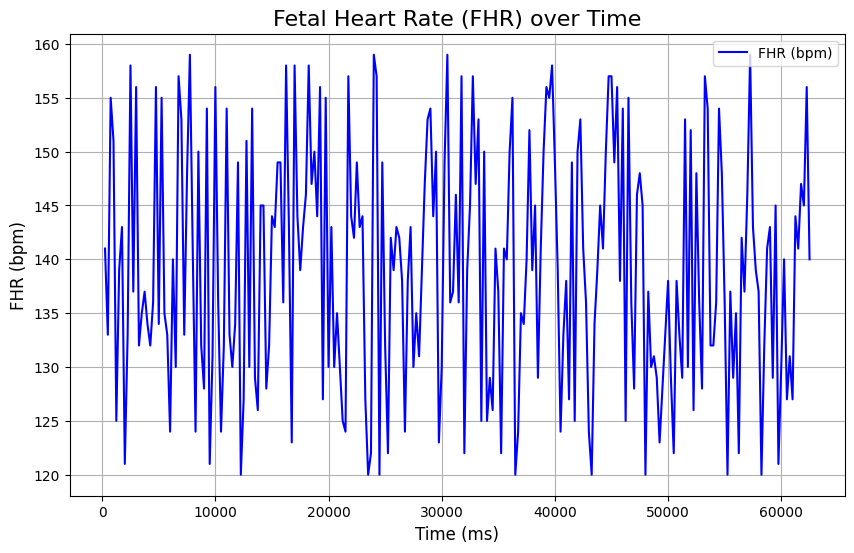

In [22]:
# Plot FHR over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Time (ms)'], df['FHR (bpm)'], color='blue', label='FHR (bpm)')
plt.title('Fetal Heart Rate (FHR) over Time', fontsize=16)
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('FHR (bpm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

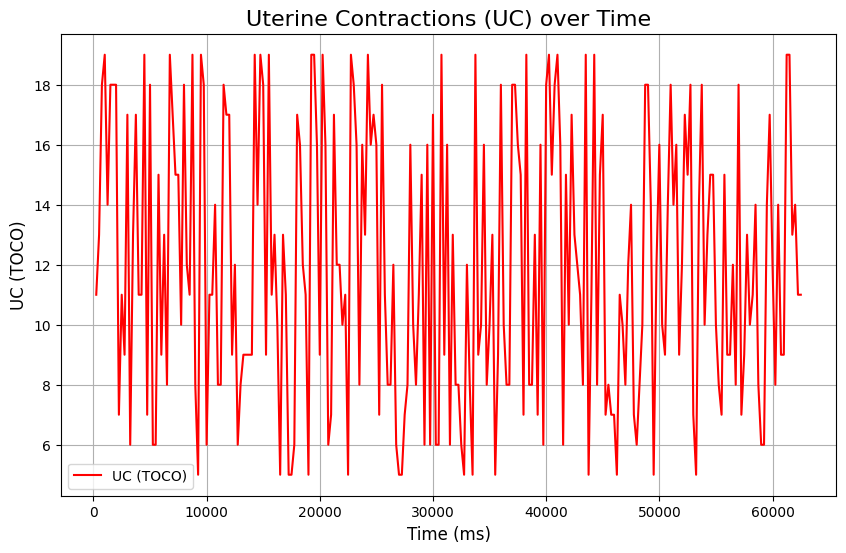

In [23]:
# Plot UC (TOCO) over Time
plt.figure(figsize=(10, 6))
plt.plot(df['Time (ms)'], df['UC (TOCO)'], color='red', label='UC (TOCO)')
plt.title('Uterine Contractions (UC) over Time', fontsize=16)
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('UC (TOCO)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## FHR Analysis

In [25]:
def analyze_fhr_epochs(df, epoch_duration_ms=3750):
   
    # Calculate number of epochs
    total_time = df['Time (ms)'].max()
    num_epochs = total_time // epoch_duration_ms

    epoch_results = []
    
    # Loop over each epoch
    for epoch in range(int(num_epochs)):
        # Calculate the start and end time for each epoch
        start_time = epoch * epoch_duration_ms
        end_time = start_time + epoch_duration_ms
        
        # Subset the data for this epoch
        epoch_data = df[(df['Time (ms)'] >= start_time) & (df['Time (ms)'] < end_time)]
        
        # Calculate average FHR for the epoch
        avg_fhr_bpm = epoch_data['FHR (bpm)'].mean()
        
        # Calculate the average pulse interval (ms)
        if avg_fhr_bpm > 0:  # Prevent division by zero
            avg_pulse_interval_ms = (60 / avg_fhr_bpm) * 1000
        else:
            avg_pulse_interval_ms = None
        
        # Store the results for this epoch
        epoch_results.append({
            'Epoch': epoch + 1,
            'Avg FHR (bpm)': avg_fhr_bpm,
            'Avg Pulse Interval (ms)': avg_pulse_interval_ms
        })

    # Convert the results into a DataFrame
    epoch_df = pd.DataFrame(epoch_results)
    return epoch_df



In [26]:

# Assuming df_generated is the DataFrame with Time and FHR data
epoch_df = analyze_fhr_epochs(df)
epoch_df

,Epoch,Avg FHR (bpm),Avg Pulse Interval (ms)
0,1,139.928571,428.790199
1,2,139.266667,430.828147
2,3,139.333333,430.622010
3,4,135.533333,442.695524
4,5,145.333333,412.844037
5,6,139.466667,430.210325
6,7,137.866667,435.203095
7,8,139.400000,430.416069
8,9,142.533333,420.954163
9,10,135.266667,443.568260


## UC Peak Detection

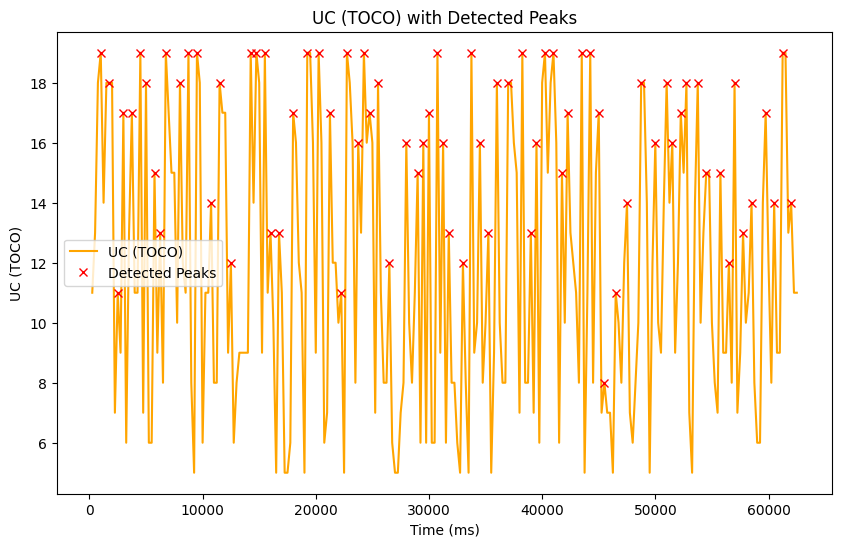

{'Total Peaks Detected': 75, 'Peaks Wider than 30 seconds': 0, 'Average Width of Peaks (ms)': 0}


In [27]:

from scipy.signal import find_peaks, peak_widths

def detect_uc_peaks(df, time_interval_ms=250, min_width_ms=30000):

    # Extract UC (TOCO) values and Time (ms)
    uc_data = df['UC (TOCO)'].values
    time_data = df['Time (ms)'].values

    # Detect peaks in the UC data
    peaks, _ = find_peaks(uc_data)

    # Calculate the width of the peaks at half the peak height
    results_half = peak_widths(uc_data, peaks, rel_height=0.5)

    # Convert the width from indices to milliseconds
    peak_widths_ms = results_half[0] * time_interval_ms

    # Find peaks where width > 30 seconds (30000 ms)
    wide_peaks = peak_widths_ms > min_width_ms
    wide_peak_widths = peak_widths_ms[wide_peaks]

    # Calculate the average width of peaks wider than 30 seconds
    avg_peak_width_ms = wide_peak_widths.mean() if len(wide_peak_widths) > 0 else 0

    # Plot the UC data and the detected peaks
    plt.figure(figsize=(10, 6))
    plt.plot(time_data, uc_data, label='UC (TOCO)', color='orange')
    plt.plot(time_data[peaks], uc_data[peaks], "x", label='Detected Peaks', color='red')
    plt.title('UC (TOCO) with Detected Peaks')
    plt.xlabel('Time (ms)')
    plt.ylabel('UC (TOCO)')
    plt.legend()
    plt.show()

    return {
        "Total Peaks Detected": len(peaks),
        "Peaks Wider than 30 seconds": len(wide_peak_widths),
        "Average Width of Peaks (ms)": avg_peak_width_ms
    }

# Assuming df_generated is the DataFrame with Time and UC data
uc_peak_analysis = detect_uc_peaks(df)

# Display the results
print(uc_peak_analysis)
